In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
random_state = 170

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

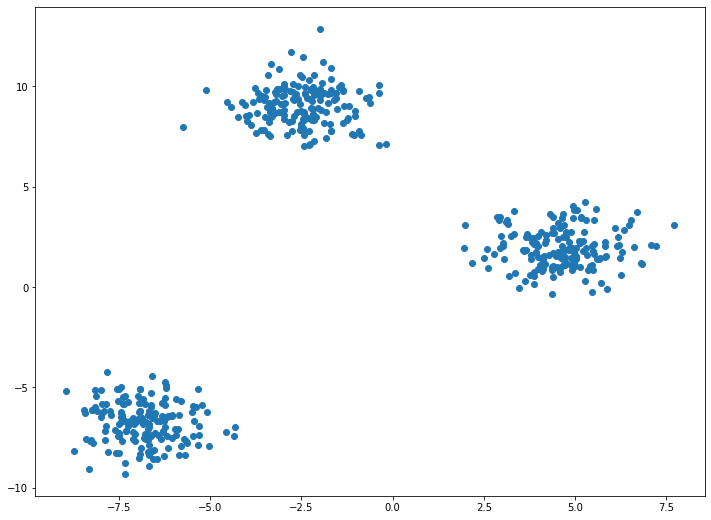

In [ ]:
plt.figure(figsize=(12, 9))

n_samples = 500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])

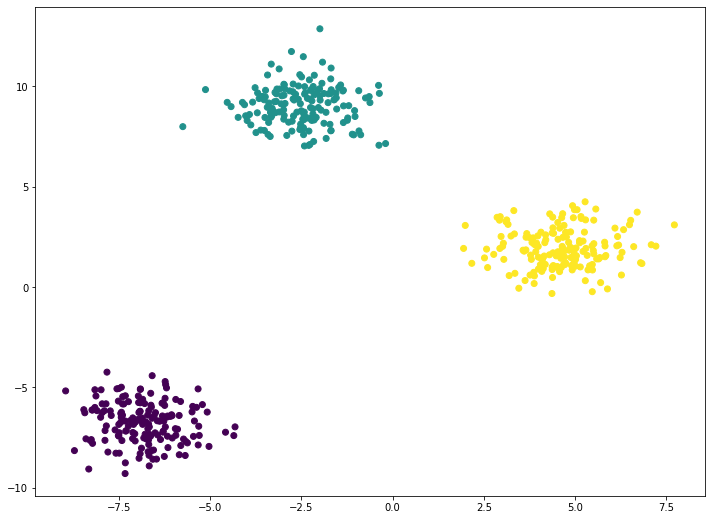

In [ ]:
plt.figure(figsize=(12, 9))

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

In [ ]:
from sklearn.metrics import homogeneity_score, completeness_score
homogeneity_score(y, y_pred), completeness_score(y, y_pred)

(1.0, 1.0)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y), silhouette_score(X,y_pred)

(0.8437565906781406, 0.8437565906781406)

In [ ]:
from IPython.display import display, Math
display(Math(r'\mathrm{S} = \frac{b - a}{max(a,b)}'))

<IPython.core.display.Math object>

Text(0.5, 1.0, 'Circles')

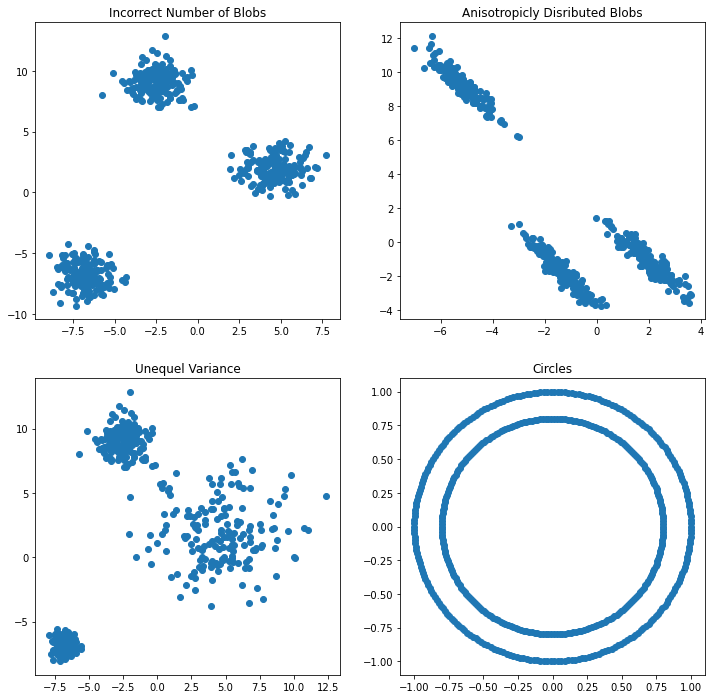

In [ ]:
plt_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.scatter(X[:,0], X[:,1])
plt.title("Incorrect Number of Blobs")

transformation = [[0.6, -0.6], [-0.4, 0.85]]
X_aniso = np.dot(X, transformation)

plt.subplot(222)
plt.scatter(X_aniso[:,0], X_aniso[:,1])
plt.title("Anisotropicly Disributed Blobs")

X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

plt.subplot(223)
plt.scatter(X_varied[:,0], X_varied[:,1])
plt.title("Unequel Variance")

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(224)
plt.scatter(X[:,0], X[:,1])
plt.title("Circles")

Text(0.5, 1.0, 'Circles')

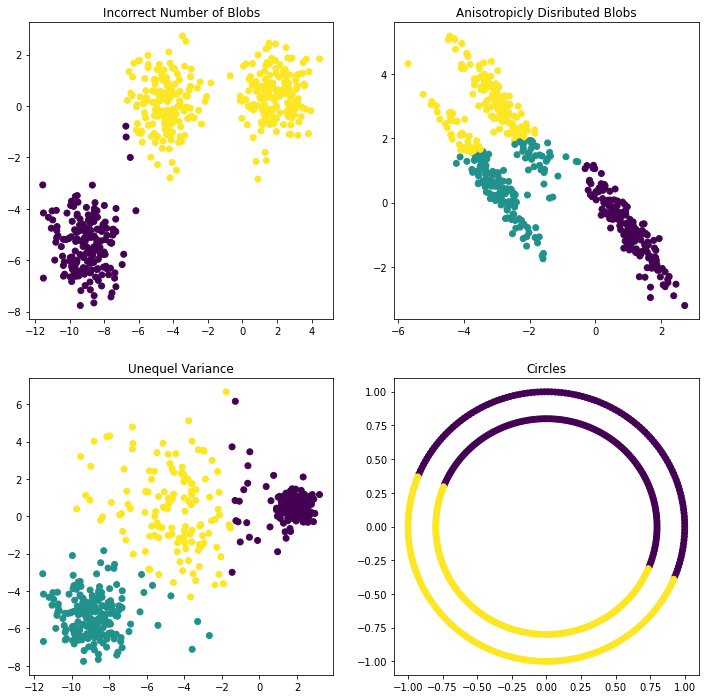

In [ ]:
# 1
plt_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.figure(figsize=(12,12))

plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Incorrect Number of Blobs")


#2

transformation = [[0.6, -0.6], [-0.4, 0.85]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=y_pred)
plt.title("Anisotropicly Disributed Blobs")

#3

X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:,0], X_varied[:,1], c=y_pred)
plt.title("Unequel Variance")

#4

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Circles")

In [ ]:
from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'Unequal Varience')

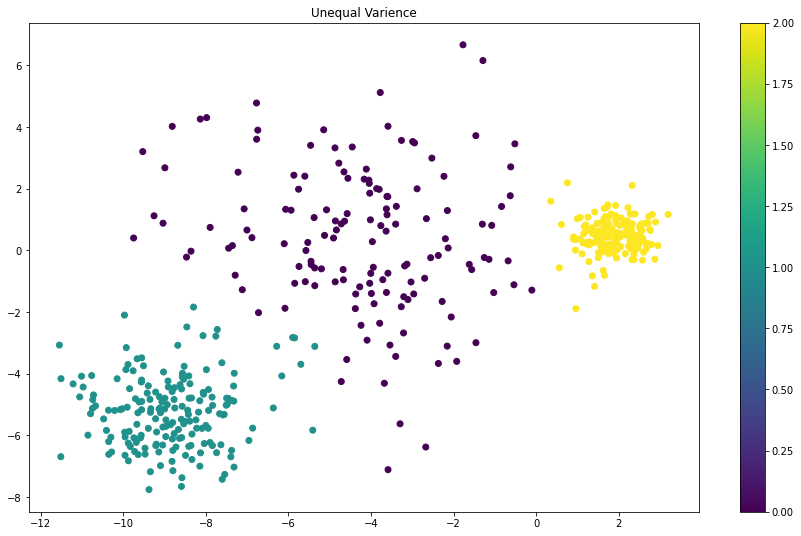

In [ ]:
y_pred = AgglomerativeClustering(n_clusters=3).fit_predict(X_varied)

plt.figure(figsize=(15,9))
plt.scatter(X_varied[:,0], X_varied[:,1], c=y_pred)
plt.colorbar()
plt.title("Unequal Varience")



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('russian'))

In [ ]:
!wget https://raw.githubusercontent.com/gingeard/npl051120/master/lenta-ru-news_small.csv

--2020-11-05 17:16:07--  https://raw.githubusercontent.com/gingeard/npl051120/master/lenta-ru-news_small.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12546193 (12M) [text/plain]
Saving to: ‘lenta-ru-news_small.csv.1’

lenta-ru-news_small 100%[===================>]  11.96M  48.6MB/s    in 0.2s    

2020-11-05 17:16:08 (48.6 MB/s) - ‘lenta-ru-news_small.csv.1’ saved [12546193/12546193]



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
df = pd.read_csv('lenta-ru-news_small.csv', usecols=['text', 'tags'])
df = df[(df['tags'] == 'Политика') | (df['tags'] == 'Техника')]
count_vect = CountVectorizer(max_features=5000)
matrix_count = count_vect.fit_transform(df.text).toarray()

In [ ]:
df.tags = df.tags.apply(lambda x: str(x))
df.tags.value_counts()

Политика    640
Техника      13
Name: tags, dtype: int64

In [ ]:
%%time
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

p = PCA(n_components=2)
pca_res = p.fit_transform(matrix_count)
label = OrdinalEncoder(dtype=np.int32).fit_transform(df.tags.fillna(0).values.reshape(-1,1)).reshape(-1)

CPU times: user 320 ms, sys: 109 ms, total: 430 ms
Wall time: 248 ms


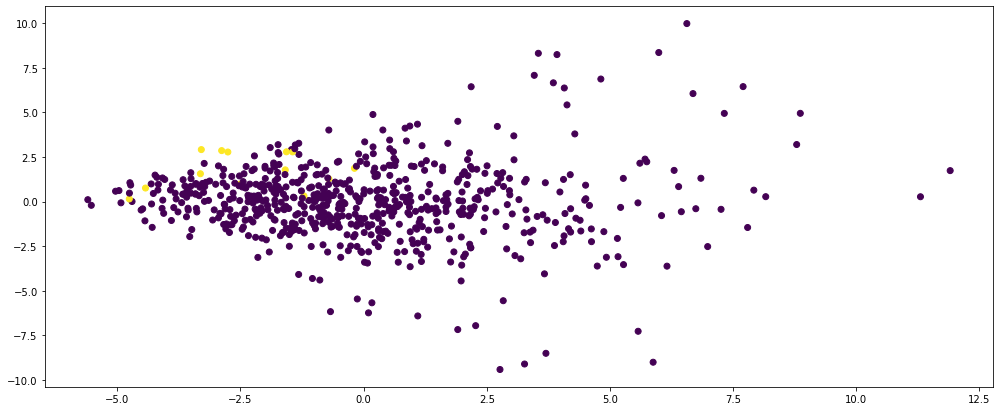

In [ ]:
# from matplotlib import pyplot as plt
plt.figure(figsize=(17,7))
plt.scatter(pca_res[:,0], pca_res[:,1], c=label)

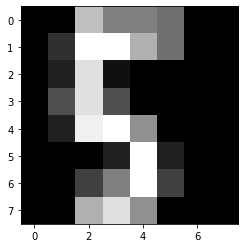

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.images[25], cmap='gray')

In [ ]:
p = PCA(n_components=21)
pca_res = p.fit_transform(digits.data)
label = OrdinalEncoder(dtype=np.int32).fit_transform(digits.target.reshape(-1,1)).reshape(-1)


In [ ]:
pca_res.shape

(1797, 21)

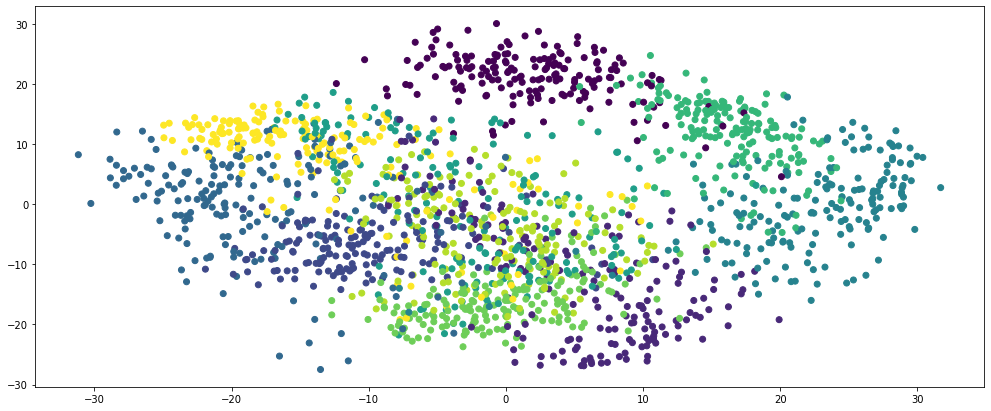

In [ ]:
plt.figure(figsize= (17,7))
plt.scatter(pca_res[:,0],pca_res[:,1], c=label)

In [ ]:
df.head()

,text,tags
0,Военно-морские силы США снова потеряли из виду...,Техника
5,Посольство России в Эстонии ответило на заявле...,Политика
12,Президент России Владимир Путин открыл движени...,Политика
23,Президент России Владимир Путин прокомментиров...,Политика
32,Высший суд Испании начал расследование о дейст...,Политика


In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 8.2MB 7.6MB/s 


In [ ]:
import re
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)
def simple_word_tokenize(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if t and not t.isspace()]

def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words if len(x) >= 4]

import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
bow_txts = [token_r(str(txt)) for txt in tqdm(df.text)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
import gensim
wrd_index = gensim.corpora.Dictionary(bow_txts)

In [ ]:
no_above = 0.5
buzzwords = {}
for key, val in wrd_index.items():
  if wrd_index.dfs[key] > no_above * wrd_index.num_docs:
    buzzwords[val] = wrd_index.dfs[key]/wrd_index.num_docs
wrd_index.filter_extremes(no_above=no_above, no_below=4, keep_n = None)

In [ ]:
buzzwords

{'быть': 0.6003062787136294,
 'год': 0.6600306278713629,
 'заявить': 0.5482388973966309,
 'который': 0.6171516079632465,
 'президент': 0.6140888208269525,
 'россия': 0.7151607963246555,
 'также': 0.5267993874425727,
 'это': 0.781010719754977}

In [ ]:
corpus = [wrd_index.doc2bow(txt) for txt in tqdm(bow_txts)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : &(levelname)s : %(message)s', level=logging.INFO)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                   id2word = wrd_index,
                                   num_topics=20,
                                   passes=10,
                                   random_state=0,
                                   per_word_topics=True)

2020-11-05 18:27:10,888 : &(levelname)s : using symmetric alpha at 0.05
2020-11-05 18:27:10,889 : &(levelname)s : using symmetric eta at 0.05
2020-11-05 18:27:10,893 : &(levelname)s : using serial LDA version on this node
2020-11-05 18:27:10,908 : &(levelname)s : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 653 documents, updating model once every 653 documents, evaluating perplexity every 653 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-05 18:27:11,783 : &(levelname)s : -10.098 per-word bound, 1096.0 perplexity estimate based on a held-out corpus of 653 documents with 68682 words
2020-11-05 18:27:11,784 : &(levelname)s : PROGRESS: pass 0, at document #653/653
2020-11-05 18:27:12,400 : &(levelname)s : topic #13 (0.050): 0.009*"путин" + 0.008*"страна" + 0.008*"российский" + 0.007*"отметить" + 0.007*"свой" + 0.006*"лидер" + 0.006*"украина" + 0.006*"москва" + 0.006*"владимир" + 0.005*"трамп"
2020-11-05 18:27:12,401

In [ ]:
lda_model.get_document_topics(corpus[0])

[(2, 0.39831153), (15, 0.5909742)]

In [ ]:
v_topic = [len(lda_model[doc][0]) for doc in tqdm(corpus)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


(array([208., 193., 115.,  72.,  44.,  12.,   6.,   3.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

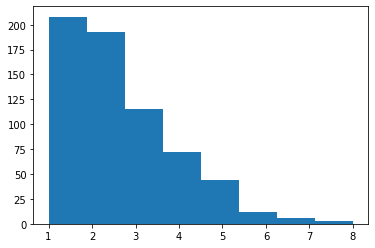

In [ ]:
plt.hist(v_topic, bins=max(v_topic))

In [ ]:
lda_model.show_topic(8,20)

[('российский', 0.01156057),
 ('пенсия', 0.009502566),
 ('свой', 0.009297632),
 ('человек', 0.008754145),
 ('мужчина', 0.007516311),
 ('гражданин', 0.0071726628),
 ('самолёт', 0.006940715),
 ('украинский', 0.0065231337),
 ('делегация', 0.0065024323),
 ('пенсионный', 0.006187159),
 ('страна', 0.0056388373),
 ('выступление', 0.0055973423),
 ('возраст', 0.0055734827),
 ('американский', 0.0055124075),
 ('стать', 0.00546127),
 ('форум', 0.00524767),
 ('вопрос', 0.0051085986),
 ('декабрь', 0.0050542),
 ('работа', 0.0049480153),
 ('поздний', 0.0046051615)]

In [ ]:
for t in range(lda_model.num_topics):
  words = lda_model.show_topic(t, 2)
  tf = sum(w for f,w in words)
  for w,f in words:
    print(w, f/tf)
  print('----------')


турция 0.5647988493248067
американский 0.43520115067519327
----------
декабрь 0.5735367846079343
закон 0.4264632153920657
----------
российский 0.5027138750469115
область 0.49728612495308855
----------
вашингтон 0.5288635791608899
санкция 0.47113642083911006
----------
корабль 0.5689818889603586
ноябрь 0.4310181110396413
----------
трамп 0.5149224608626988
украина 0.4850775391373013
----------
нато 0.6246583995809954
альянс 0.37534160041900455
----------
декабрь 0.5330136264070091
ребёнок 0.4669863735929909
----------
российский 0.5488532178747864
пенсия 0.45114678212521364
----------
страна 0.5037332736308066
российский 0.4962667263691935
----------
страна 0.6510065246700754
москва 0.3489934753299247
----------
дело 0.5113704413421211
партия 0.48862955865787894
----------
российский 0.5214987340274837
чеченский 0.4785012659725163
----------
путин 0.5471544435127751
ельцин 0.4528455564872249
----------
российский 0.5152370214606875
путин 0.48476297853931255
----------
наркотик 0.606793

In [ ]:
from pprint import pprint
pprint(lda_model,print_topics())

NameError: ignored

In [ ]:
topics = gensim.matutils.corpus2dense([x[0] for x in lda_model[corpus]], lda_model.num_topics)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [ ]:
weight = topics.sum(axis=1)
weight

array([44.43484 , 14.901674, 39.585613, 35.446407, 33.991898, 37.60328 ,
       27.355947, 18.222452, 17.90094 , 35.683617, 26.54488 , 29.352974,
       32.396175, 20.294329, 40.797855, 25.422995, 32.100998, 36.431915,
       72.18779 , 26.364948], dtype=float32)

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 7.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=27d892f821cc030deb540c165d51c094ad0cd7008c28b6aa5ab8461fc2ae3bf3
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
from pyLDAvis import gensim as pyLDAvis_gensim

In [ ]:
lda_display = pyLDAvis_gensim.prepare(lda_model, corpus, wrd_index, sort_topics=False)

2020-11-05 18:41:33,162 : &(levelname)s : NumExpr defaulting to 2 threads.


In [ ]:
pyLDAvis.save_html(lda_display, 'lda.html')

In [ ]:
!pip install wordcloud

In [ ]:
import wordcloud
wc = wordcloud.WordCloud(width=800, height=400, margin=5, colormap='RdYlGn')

In [ ]:
max_topic = weight.argmax()
words = dict(lda_model.show_topic(max_topic, 100))

In [ ]:
wc.generate_from_frequencies(words)

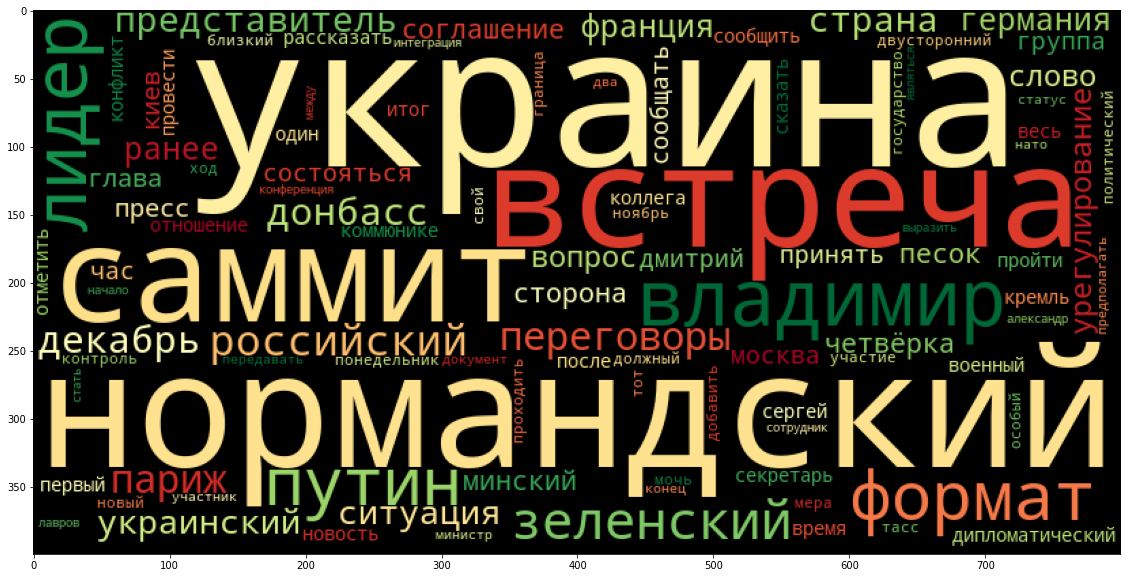

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(wc)